# Introduction

In [2]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
n_runs = 1000
time_break = 30
p_vector = np.array([])

for i in range(n_runs):
    time_counter = 0 
    n = 1000

    # Vector of states
    states = np.repeat("S",n)
    states[0] = "I"

    # Probabilities of entering 
    prob_S_I = 0.9
    prob_I_R = 0.3

    n_S = np.array([len(np.where(states == "S")[0])])
    n_I = np.array([len(np.where(states == "I")[0])])
    n_R = np.array([len(np.where(states == "R")[0])])


    while ("I" in states):
        
        # Get positions of S, I, R
        S_index = np.where(states == "S")[0]
        I_index = np.where(states == "I")[0]
        R_index = np.where(states == "R")[0]

        # Update susceptible
        prob_S_I_t = prob_S_I * len(I_index)/n
        states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


        # Update infected
        states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


        n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
        n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
        n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
        
        time_counter += 1
        
        
    if len(n_I) > time_break:
        p_vector = np.concatenate([p_vector, np.array([1])])
    else:
        p_vector = np.concatenate([p_vector, np.array([0])])
        
likelihood = np.sum(p_vector)/len(p_vector)

print("The likelihood that the disease dies out after {} days: {}".format(time_break,np.round(1-likelihood,3)))

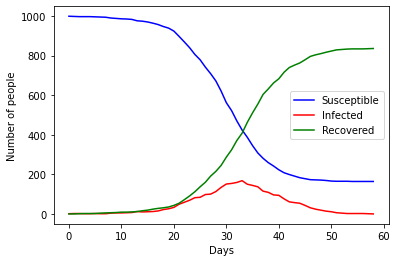

Maximum number of infected:  168


In [22]:
#print(states)
#print(n_S)
#print(n_I)
#print(n_R)

plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))


## SIRS

In [ ]:
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering 
prob_S_I = 0.9
prob_I_R = 0.3
prob_R_S = 0.015

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])


while "I" in states:
    
    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


    # Update recovered
    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))

    
    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])

In [ ]:
#print(states)
#print(n_S)
#print(n_I)
#print(n_R)

plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))

Maximum number of infected siger noget om e.g. antal hospitalspladser.. 

## SIRS with death

In [ ]:
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering different states
prob_S_I = 0.95
prob_I_R = 0.2
prob_R_S = 0.8
prob_I_D = 0.06

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])
n_D = np.array([len(np.where(states == "D")[0])])


while "I" in states or "R" in states:
    
    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Update susceptible
    prob_S_I_t = prob_S_I * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_S_I_t, prob_S_I_t]), size = len(S_index))


    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R", "D"]),p = np.array([1-prob_I_R - prob_I_D, prob_I_R, prob_I_D]), size = len(I_index))


    # Update recovered
    states[R_index] = np.random.choice(np.array(["R", "S"]),p = np.array([1-prob_R_S, prob_R_S]), size = len(R_index))

    
    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
    n_D = np.concatenate([n_D, np.array([len(np.where(states == "D")[0])])])

In [ ]:
plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.plot(n_D, "-0", label = "Dead")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.legend()
plt.show()

plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.plot(n_D, "-0", label = "Dead")
plt.ylabel("Number of people")
plt.xlabel("Days")
plt.xlim(0,100)
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))
print("Number of dead individuals after ended epedemic: ", n_D[-1])


## SEIR

In [ ]:
n = 1000

# Vector of states
states = np.repeat("S",n)
states[0] = "I"

# Probabilities of entering 
prob_S_E = 0.9
prob_I_R = 0.3

n_S = np.array([len(np.where(states == "S")[0])])
n_E = np.array([len(np.where(states == "E")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])

E_times = np.zeros(n)
E_mean = 5
E_scale = 1

while "I" in states:
    
    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    E_index = np.where(states == "E")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]
    
    # Update exposed
    E_times[E_index] = E_times[E_index] - 1
    states[np.where((E_times == 0) & (states == "E"))] = "I"

    # Update susceptible
    prob_S_E_t = prob_S_E * len(I_index)/n
    states[S_index] = np.random.choice(np.array(["S", "E"]),p = np.array([1-prob_S_E_t, prob_S_E_t]), size = len(S_index))
    
    # Assign incubation time for exposed
    E_index_new = np.where((states == "E") & (E_times == 0))
    E_times[E_index_new] = np.round(np.random.normal(loc = E_mean, scale = E_scale))
    
    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))


    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_E = np.concatenate([n_E, np.array([len(np.where(states == "E")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])


In [ ]:
plt.figure()
plt.plot(n_S, "-b", label = "Susceptible")
plt.plot(n_E, "-y", label = "Exposed")
plt.plot(n_I, "-r", label = "Infected")
plt.plot(n_R, "-g", label = "Recovered")
plt.ylabel("Number of people")
plt.xlabel("Days")
#plt.xlim(0,100)
plt.legend()
plt.show()

print("Maximum number of infected: ", max(n_I))


## Modeling subgroups with different levels of exposure
Now we model subgroups of families, workplaces etc., which will determine the probability of exposure. 
We will base this on the earlier described SIR model. 

In [6]:
# Define number of people (you may change here)
n = 1000

# Define number of families (you may change here)
n_families = 10
family_types = np.arange(1,n_families+1)

# Define work types (you may change here)
work_types = np.array(["BYG", "MMC", "KBS", "WIND"])
work_probs = np.array([0.1, 0.2, 0.4, 0.3])
n_work_types = len(work_types)

# Define vector of states
states = np.repeat("S",n)
states[0] = "I"
states_matrix = np.copy([states])


states_matrix = np.vstack((states_matrix, states ))
print(states_matrix)

# Probabilities of entering 
prob_S_I = 0.9
prob_I_R = 0.3

n_S = np.array([len(np.where(states == "S")[0])])
n_I = np.array([len(np.where(states == "I")[0])])
n_R = np.array([len(np.where(states == "R")[0])])


# Generate workplaces
workplaces_sorted = np.sort(np.random.choice(work_types,n, p = work_probs))
counts = np.unique(workplaces_sorted, return_counts = True)[1]
workplaces_counts_sorted = np.repeat(counts, counts)
random_positions = np.random.choice(np.arange(0,n), size = n, replace=False)

# Update workplaces based on positions
workplaces = workplaces_sorted[random_positions]
workplaces_counts = workplaces_counts_sorted[random_positions]

# Update families based on positions
families = np.sort(np.random.choice(family_types, n))
counts = np.unique(workplaces_sorted, return_counts = True)[1]
families_counts = np.repeat(counts, counts)

while ("I" in states):

    # Get positions of S, I, R
    S_index = np.where(states == "S")[0]
    I_index = np.where(states == "I")[0]
    R_index = np.where(states == "R")[0]

    # Count infected at each worktype
    work_I = np.zeros(n)
    for work in work_types:
        work_index = np.where(workplaces == work)[0]
        work_I[work_index] += len(np.where((workplaces == work) & (states == "I"))[0])
        
    # Count infected at each family  
    family_I = np.zeros(n)
    for family in family_types:
        family_index = np.where(families == family)[0]
        family_I[family_index] += len(np.where((families == family) & (states == "I"))[0])
        
    # Calculate probability
    prob_vector = prob_S_I * ((work_I + family_I) / (workplaces_counts + families_counts))

    
    for pos in S_index:
        states[pos] = np.random.choice(np.array(["S","I"]),p = np.array([1-prob_vector[pos], prob_vector[pos]]))
        
        

    # Update infected
    states[I_index] = np.random.choice(np.array(["I", "R"]),p = np.array([1-prob_I_R, prob_I_R]), size = len(I_index))
    
    
    # Update states_matrix
    states_matrix = np.vstack((states_matrix, states ))
    
    n_S = np.concatenate([n_S, np.array([len(np.where(states == "S")[0])])])
    n_I = np.concatenate([n_I, np.array([len(np.where(states == "I")[0])])])
    n_R = np.concatenate([n_R, np.array([len(np.where(states == "R")[0])])])
    




[['I' 'S' 'S' ... 'S' 'S' 'S']
 ['I' 'S' 'S' ... 'S' 'S' 'S']]


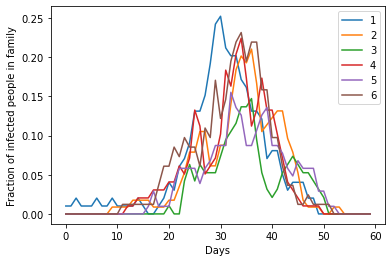

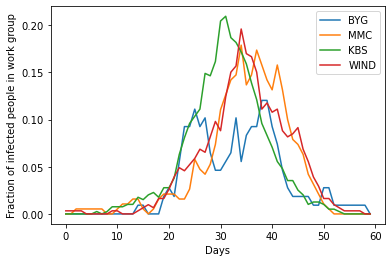

In [17]:
plt.figure()

for fam_number in family_types[0:6]:
    n_fam = np.array([])
    for row in states_matrix:
        f = len(np.where((row == "I")& (families == fam_number))[0])
        n_fam = np.concatenate([n_fam, np.array([f])])
        
    n_frac_fam = n_fam/np.sum(families == fam_number)
    
    plt.plot(n_frac_fam, label = str(fam_number))

plt.legend()
plt.ylabel("Fraction of infected people in family")
plt.xlabel("Days")
plt.show()


plt.figure()

for work_string in work_types:
    n_work = np.array([])
    for row in states_matrix:
        w = len(np.where((row == "I")& (workplaces == work_string))[0])
        n_work = np.concatenate([n_work, np.array([w])])
    
    n_frac_work = n_work/np.sum(workplaces == work_string)
        
    plt.plot(n_frac_work, label = work_string)

plt.legend()
plt.ylabel("Fraction of infected people in work group")
plt.xlabel("Days")
plt.show()